In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel(r"E:/Data Port/userdata/active_users.xlsx")
df

,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,...,w47,w48,w49,w50,w51,w52,w53,w54,w55,w56
0,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,231d91be38352d7a,306243851b716bf6,149f7dd1efe25ebc,191a909000d7123d,191a909000d7123d,...,ffedb2a5b3b4838,ffedb2a5b3b4838,fff444dcd8f9808f,ffedb2a5b3b4838,ffedb2a5b3b4838,ffedb2a5b3b4838,ffedb2a5b3b4838,fffe76c3a948cdfb,fffe76c3a948cdfb,fffe76c3a948cdfb
1,673000000000000,5ff4cd01b5eae601,1402081a023d5c18,45b649baf6882a4a,c92f828ffdd1c1c0,7c8de50e4a84f1ee,eff8ecf5cb54ffe7,b50740442eb78a75,e85d8cc04adae6cc,cf8dfdbbb526c506,...,ba41adb7a1568fc5,bd978de5c78a1e7f,bcd8431a4069ef3a,bc5171f7f40e4ba3,bc1a7fed50193f41,bb1e4d0008cbabf,bb2e76bb3174a0be,bd0228ee50f09d79,bb4370c7306bb336,b81f04d72ef2e150
2,15600000000000000000000,7cd4b3218dbffa0b,99acf0df83dc2831,49740201a5f203eb,8cf94ff315895955,58453f722733b72e,7ec2e98a1613db6c,20e2a9da9c0146ee,fbeb97ecc066639,42aabbe8fa2b258a,...,a511a97e74f9677,a88369720be3c554,a9546553268bcf50,a80bcb52740a9ccd,a7292f3d0d80985b,a5d5d8560d64b95a,a7914920e3ef2b55,a95f016d03945e5c,a6e99e4acd1701d6,a3c2066710a6d65
3,10156b703e26c334,25167a08527132ac,4820782b3cb8f570,ae16cc7b72fcee52,ecaa9c1913ef2f65,e02ecf94fd8ee5c8,1aba368c76311ef3,49b64be1edab128c,6dff050c07b69b4e,b6be357ac8671a1f,...,9d8b69e45996efdb,a1c927674d1c3e37,a2565f9bd8a7a243,a05f290a51f117b,9eef01de4af7d619,9d6d4be4eab27e4b,a01148c9b12f3c15,a29b81926b57d967,9f5835c16ef759bb,9af6497cd753b9b9
4,103f96126c333035,7fbf03c17ea12589,d8aaa5b13424da35,bd26c51dd185a3cb,6028ea4b2b053007,b5c3d0e920ed6175,fa45dfe1357d3db9,b9928cbdfb35c1,d6a7f937733dea7,b7a452cfbee2d008,...,d6ced5ac1e36fa7f,d7d7f04cd08fb30a,d8b45fea77674125,d8b5f93003dc0e5a,d7f6ec45f8815d98,d6ec98374c4a453,d7415d7979ce86d9,d84e5dc003ef9155,d851694a086bfc17,d63515fbe6484033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Initialize DataFrames for Retained, Churned, and New Users
retained_users_df = pd.DataFrame(columns=df.columns[1:])
churned_users_df = pd.DataFrame(columns=df.columns[1:])
new_users_df = pd.DataFrame(columns=df.columns[1:]) 

# Total number of weeks to process
total_weeks = len(df.columns) - 1 

In [8]:
# Loop through the columns (weeks), starting from the second column (w2)
for i in range(1, len(df.columns)):  # Start from w2
    current_week = df.columns[i]
    previous_week = df.columns[i - 1]
    
    # Merge to find the retained users (common values between current_week and previous_week)
    merged_retained = df[[previous_week]].merge(df[[current_week]], left_on=previous_week, right_on=current_week, how='inner')
    
    # Store the retained users in the corresponding week column
    retained_users_df[current_week] = merged_retained[current_week]

     # Merge to find the churned users (values in previous_week not in current_week)
    merged_churned = df[[previous_week]].merge(df[[current_week]], left_on=previous_week, right_on=current_week, how='left', indicator=True)
    
    # Churned users: Values in previous_week not found in current_week
    churned_users_df[current_week] = merged_churned[merged_churned['_merge'] == 'left_only'][previous_week]

    # Merge to find new users (values in current_week not in previous_week)
    merged_new = df[[previous_week]].merge(df[[current_week]], left_on=previous_week, right_on=current_week, how='right', indicator=True)
    
    # New users: Values in current_week not found in previous_week
    new_users_df[current_week] = merged_new[merged_new['_merge'] == 'right_only'][current_week]
    
    # Progress tracking
    progress = (i / total_weeks) * 100  # Calculate progress percentage
    print(f"Processing {current_week}... Progress: {progress:.2f}%")

Processing w2... Progress: 1.82%
Processing w3... Progress: 3.64%
Processing w4... Progress: 5.45%
Processing w5... Progress: 7.27%
Processing w6... Progress: 9.09%
Processing w7... Progress: 10.91%
Processing w8... Progress: 12.73%
Processing w9... Progress: 14.55%
Processing w10... Progress: 16.36%
Processing w11... Progress: 18.18%
Processing w12... Progress: 20.00%
Processing w13... Progress: 21.82%
Processing w14... Progress: 23.64%
Processing w15... Progress: 25.45%
Processing w16... Progress: 27.27%
Processing w17... Progress: 29.09%
Processing w18... Progress: 30.91%
Processing w19... Progress: 32.73%
Processing w20... Progress: 34.55%
Processing w21... Progress: 36.36%
Processing w22... Progress: 38.18%
Processing w23... Progress: 40.00%
Processing w24... Progress: 41.82%
Processing w25... Progress: 43.64%
Processing w26... Progress: 45.45%
Processing w27... Progress: 47.27%
Processing w28... Progress: 49.09%
Processing w29... Progress: 50.91%
Processing w30... Progress: 52.73

In [10]:
# Count the number of unique retained users for each week
retained_counts = retained_users_df.apply(lambda x: len(x.unique()))

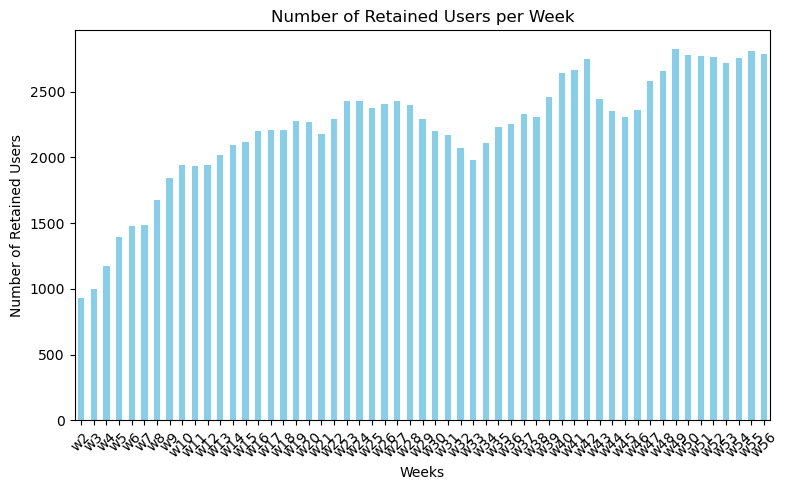

In [11]:
# Plotting the retained users count
plt.figure(figsize=(8, 5))
retained_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Retained Users per Week')
plt.xlabel('Weeks')
plt.ylabel('Number of Retained Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# Calculate the retention rate week-over-week
retention_rates = []
for i in range(1, len(df.columns)):
    current_week = df.columns[i]
    previous_week = df.columns[i - 1]
    
    # Get the unique retained users for the current week
    retained_users = pd.unique(retained_users_df[current_week].values)
    
    # Get the total unique users in the previous week (the denominator)
    previous_week_users = pd.unique(df[previous_week].values)
    
    # Calculate retained count (number of users retained)
    retained_count = len(retained_users)  # Common retained users
    
    # Calculate retention rate
    total_previous_week_users = len(previous_week_users)  # Total users in the previous week
    retention_rate = (retained_count / total_previous_week_users) * 100
    retention_rates.append(retention_rate)

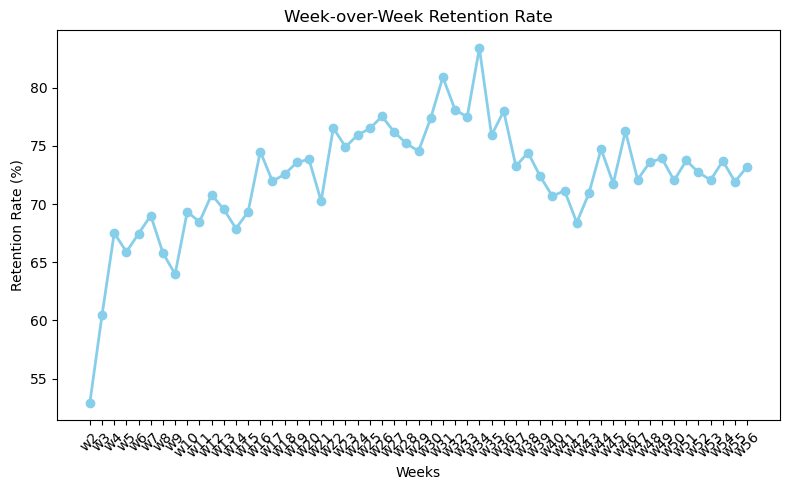

In [15]:
# Plotting the retention rate week-over-week
weeks = df.columns[1:]  # Exclude w1 from the weeks list
plt.figure(figsize=(8, 5))
plt.plot(weeks, retention_rates, marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=6)
plt.title('Week-over-Week Retention Rate')
plt.xlabel('Weeks')
plt.ylabel('Retention Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
# Count the number of churned users for each week
churned_counts = churned_users_df.apply(lambda x: len(x.dropna()), axis=0)  # Count non-null churned users
churned_counts = -1 * churned_counts  # Convert to negative values

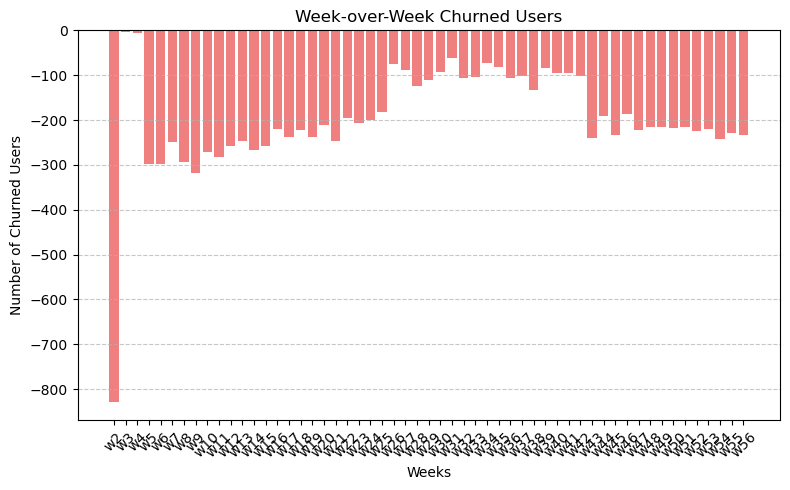

In [20]:
# Plotting the churned users as a negative bar graph
plt.figure(figsize=(8, 5))
plt.bar(churned_counts.index, churned_counts.values, color='lightcoral')
plt.title('Week-over-Week Churned Users')
plt.xlabel('Weeks')
plt.ylabel('Number of Churned Users')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.tight_layout()

# Show the plot
plt.show()

In [22]:
# Count the number of new users per week
new_users_counts = new_users_df.apply(lambda x: len(x.dropna()), axis=0)  # Count non-null new users

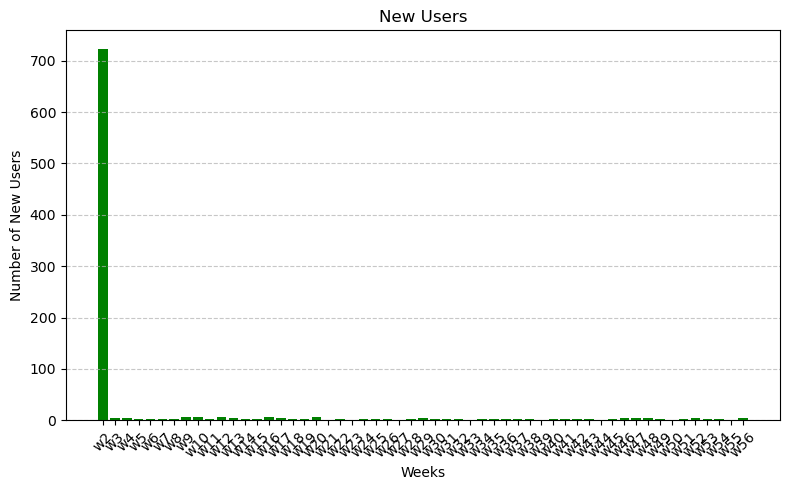

In [24]:
# Plot the new users as a bar chart
plt.figure(figsize=(8, 5))
plt.bar(new_users_counts.index, new_users_counts.values, color='green')  # Green bars for new users
plt.title('New Users')
plt.xlabel('Weeks')
plt.ylabel('Number of New Users')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.tight_layout()

# Show the plot
plt.show()

In [26]:
# Initialize DataFrame for Resurrected Users
resurrected_users_df = pd.DataFrame(columns=df.columns[1:])  # Columns w2, w3, w4, ...

# Loop through the columns (weeks), starting from the second column (w2)
for i in range(1, len(df.columns)):  # Start from w2
    current_week = df.columns[i]
    previous_week = df.columns[i - 1]
    
    # Users present in the current week
    current_week_users = set(df[current_week].dropna())

    # Users present in the previous week
    previous_week_users = set(df[previous_week].dropna())

    # Users present in ANY week BEFORE the previous week
    past_weeks_users = set(df[df.columns[:i-1]].values.ravel())  # Flatten past week users

    # Resurrected users: In current week, NOT in the previous week, but in earlier weeks
    resurrected_users = current_week_users - previous_week_users  # Exclude those already in previous week
    resurrected_users2 = resurrected_users & past_weeks_users  # Keep only those that existed before

    # Store the resurrected users in the corresponding week column
    resurrected_users_df[current_week] = pd.Series(list(resurrected_users2))

    # Progress tracking
    progress = (i / (len(df.columns) - 1)) * 100
    print(f"Processing {current_week}... Progress: {progress:.2f}%")

Processing w2... Progress: 1.82%
Processing w3... Progress: 3.64%
Processing w4... Progress: 5.45%
Processing w5... Progress: 7.27%
Processing w6... Progress: 9.09%
Processing w7... Progress: 10.91%
Processing w8... Progress: 12.73%
Processing w9... Progress: 14.55%
Processing w10... Progress: 16.36%
Processing w11... Progress: 18.18%
Processing w12... Progress: 20.00%
Processing w13... Progress: 21.82%
Processing w14... Progress: 23.64%
Processing w15... Progress: 25.45%
Processing w16... Progress: 27.27%
Processing w17... Progress: 29.09%
Processing w18... Progress: 30.91%
Processing w19... Progress: 32.73%
Processing w20... Progress: 34.55%
Processing w21... Progress: 36.36%
Processing w22... Progress: 38.18%
Processing w23... Progress: 40.00%
Processing w24... Progress: 41.82%
Processing w25... Progress: 43.64%
Processing w26... Progress: 45.45%
Processing w27... Progress: 47.27%
Processing w28... Progress: 49.09%
Processing w29... Progress: 50.91%
Processing w30... Progress: 52.73

In [28]:
# Count the number of resurrected users per week
resurrected_users_counts = resurrected_users_df.apply(lambda x: len(x.dropna()), axis=0)  # Count non-null resurrected users

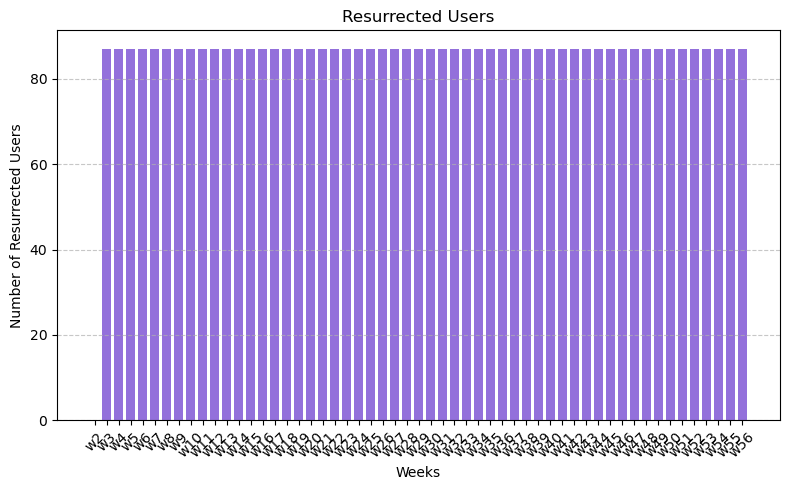

In [30]:
# Plot the resurrected users as a bar chart
plt.figure(figsize=(8, 5))
plt.bar(resurrected_users_counts.index, resurrected_users_counts.values, color='mediumpurple')  # Purple bars for resurrected users
plt.title('Resurrected Users')
plt.xlabel('Weeks')
plt.ylabel('Number of Resurrected Users')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.tight_layout()

# Show the plot
plt.show()

In [32]:
quick_ratio = (new_users_counts + resurrected_users_counts) / churned_counts

# Normalize the Quick Ratio: Scale values to range between 0 and 1
quick_ratio_normalized = (quick_ratio - quick_ratio.min()) / (quick_ratio.max() - quick_ratio.min())

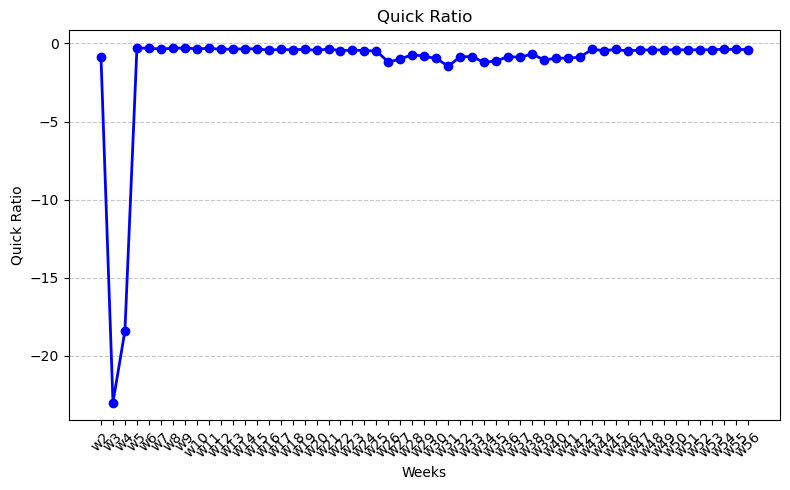

In [34]:
# Plot the Quick Ratio as a line chart
plt.figure(figsize=(8, 5))
plt.plot(quick_ratio.index, quick_ratio.values, marker='o', color='blue', linestyle='-', linewidth=2, markersize=6)
plt.title('Quick Ratio')
plt.xlabel('Weeks')
plt.ylabel('Quick Ratio')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.tight_layout()

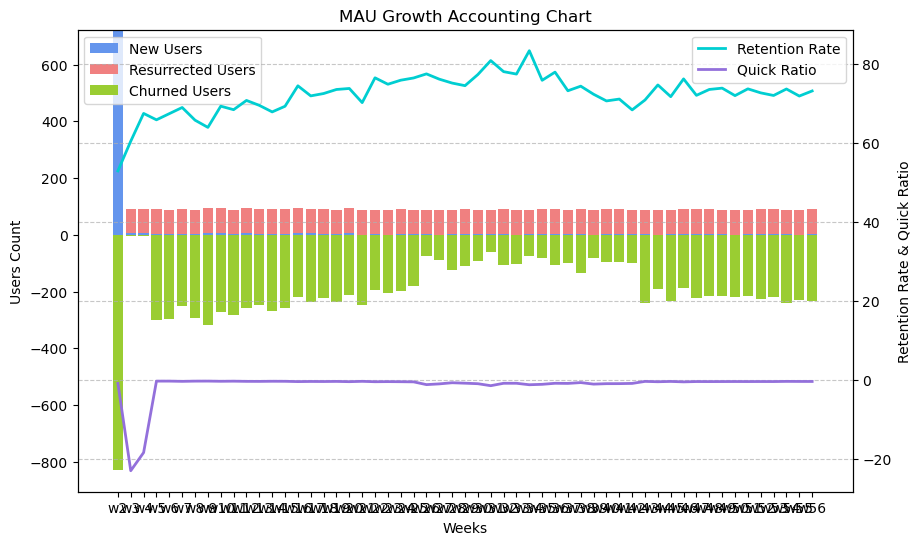

In [38]:
# Create Figure
fig, ax1 = plt.subplots(figsize=(10, 6))

# Stacked Bar Chart
ax1.bar(new_users_counts.index, new_users_counts.values, color='cornflowerblue', label="New Users")
ax1.bar(resurrected_users_counts.index, resurrected_users_counts.values, color='lightcoral', bottom=new_users_counts.values, label="Resurrected Users")
ax1.bar(churned_counts.index, churned_counts.values, color='yellowgreen', label="Churned Users")  

# Secondary Axis for Line Plot
ax2 = ax1.twinx()
ax2.plot(new_users_counts.index, retention_rates, color='darkturquoise', linestyle='-', linewidth=2, label="Retention Rate")
ax2.plot(new_users_counts.index, quick_ratio, color='mediumpurple', linestyle='-', linewidth=2, label="Quick Ratio")

# Labels and Legends
ax1.set_xlabel("Weeks")
ax1.set_ylabel("Users Count")
ax2.set_ylabel("Retention Rate & Quick Ratio")

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.title("MAU Growth Accounting Chart")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()